In [32]:
# Dataset obtained from https://www.cs.toronto.edu/~kriz/cifar.html
# Given 10 classes 

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Input, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Load Data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print("Dataset loaded successfully!")
print("Shape of Training images:", train_images.shape)

Dataset loaded successfully!
Shape of Training images: (50000, 32, 32, 3)


Shape of Training Labels: (50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]]


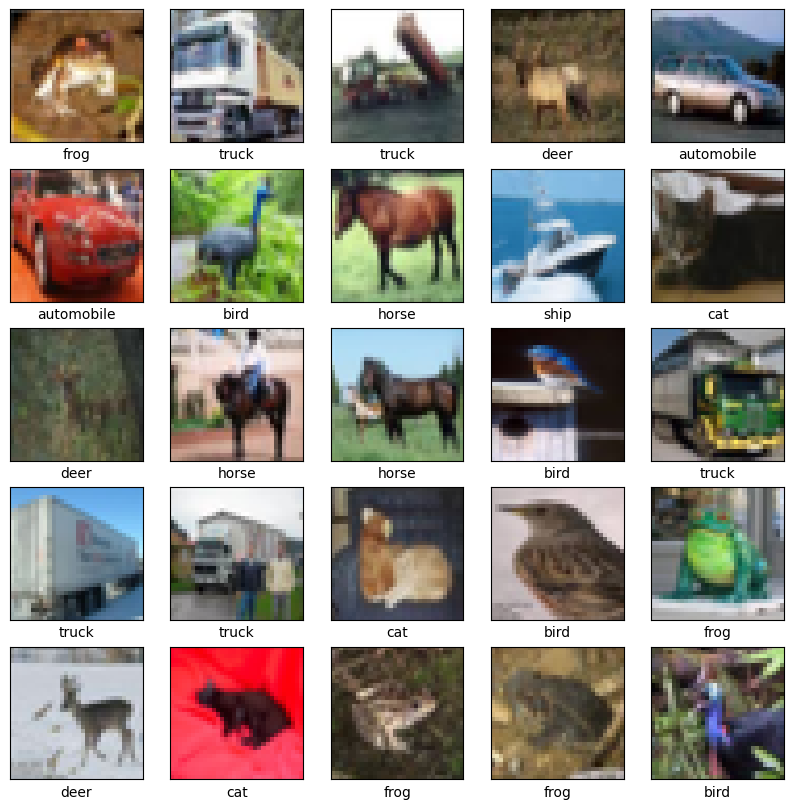

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Study the labels

print("Shape of Training Labels:", train_labels.shape)
print(train_labels[:5])

# Form List of classes to use a 'decoder ring.'
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
         'horse', 'ship', 'truck']

# Understand the labels by seeing examples of images along with their
# corresponding labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])   # '[]' Hides marking on axes
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The y labels are a numerical array where each number (1-9) correspond
    # to a class
    # label x axis using our classes list
    plt.xlabel(classes[train_labels[i][0]])
plt.show()

In [53]:
# Building the model/Convolutional Neural Network(CNN)

print(dir(models))
# help(models.Sequential()) 
# Sequential is a class/model that is a linear stack of layers

# 3rd step of tuning
# Added augmentation after tuning regularization
# This creates more training data to help with overfitting
data_augmentation = tf.keras.Sequential (
    [ layers.RandomFlip("horizontal"),
     layers.RandomRotation(0.025),
     layers.RandomZoom(0.025),
    ]
)

# Instantiate

model = models.Sequential()

# Need to initialize the layer with input arg for best practices
model.add(Input(shape=(32, 32, 3)))

## Augmentation
model.add(data_augmentation) # First layer

## First Convolutional Block
# Input: (32, 32, 3)
# Conv2D output: (30, 30, 32)
# MaxPooling2D output: (15, 15, 32)
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.00998))

## Second Convolutional Block
# Input: (15, 15, 32)
# Conv2D output: (13, 13, 64)
# MaxPooling2D output: (6, 6, 64)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.00998))

## Final Conv Block (Bottleneck)
# Input: (6, 6, 64)
# Conv2D output: (4, 4, 32)
# MaxPooling2D output: (2, 2, 32)
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.00998))

## Final Dense Layers for Classification
# Flatten output: (2 * 2 * 32) = 128 nodes
# Dense layer 1: 256 neurons
# Dense layer 2 (Bottleneck): 32 neurons
# Output layer: 10 neurons
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.00998))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

model.summary()

['Model', 'Sequential', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'clone_model', 'load_model', 'model_from_json', 'save_model']


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_50 (Sequential)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_62 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_80 (Dropout)                 │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_63 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_81 (Dropout)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 4, 4, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_64 (MaxPooling2D)      │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_82 (Dropout)                 │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_83 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,434 (310.29 KB)

 Trainable params: 79,434 (310.29 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Compile method -
# 'adam' automatically adjusts learning rate
# loss/cost function measures how wrong the model is
# from_logits=True, we apply softmax activation to normalize raw, unscaled number
# "logits" - logit(p) = log(p/(1-p))
# metrics shows us accuracy and loss
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels), callbacks=[early_stopping])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.3162 - loss: 1.8580 - val_accuracy: 0.4099 - val_loss: 1.5857
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4308 - loss: 1.5439 - val_accuracy: 0.4713 - val_loss: 1.4202
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4996 - loss: 1.3947 - val_accuracy: 0.5338 - val_loss: 1.3003
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5370 - loss: 1.3018 - val_accuracy: 0.5324 - val_loss: 1.3032
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5623 - loss: 1.2282 - val_accuracy: 0.5887 - val_loss: 1.1672
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5886 - loss: 1.1647 - val_accuracy: 0.6074 - val_loss: 1.1375
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6040 - loss: 1.1285 - val_accuracy: 0.6185 - val_loss: 1.1139
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 

In [55]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.7194 - loss: 0.8774

Test accuracy: 0.7193999886512756


In [65]:
# Assign model.fit to history
history = _

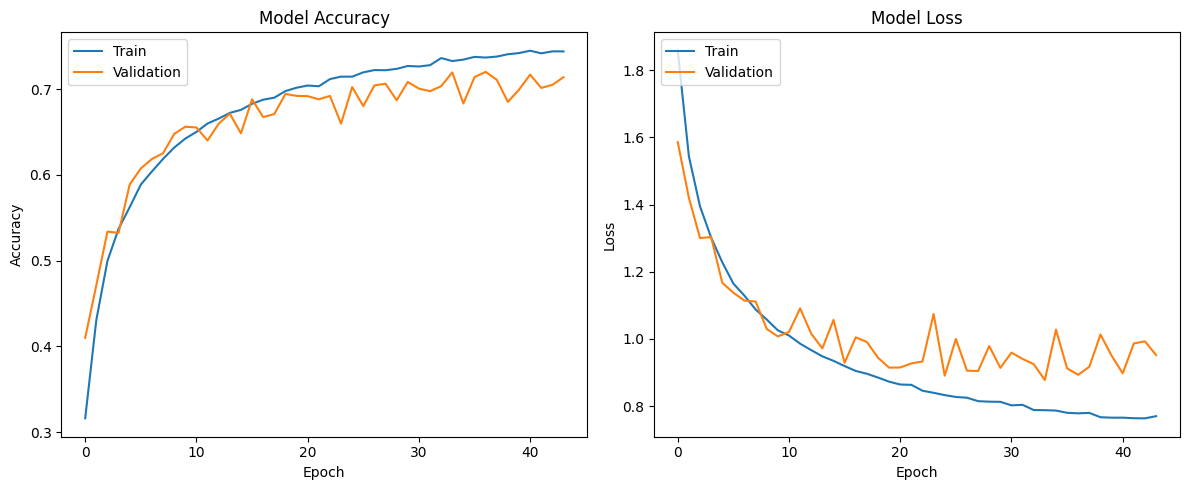

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()

# This line saves the plot as a PNG image file
plt.savefig('training_history.png')

plt.show()

In [71]:
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier

# 1. Create a function that builds and returns your compiled Keras model
def create_keras_model():
    # Define your data augmentation pipeline INSIDE this function
    data_augmentation = tf.keras.Sequential (
        [ 
          layers.RandomFlip("horizontal"),
          layers.RandomRotation(0.025),
          layers.RandomZoom(0.025),
        ]
    )

    # --- Your entire Keras model architecture goes here ---
    model = models.Sequential()
    model.add(Input(shape=(32, 32, 3)))
    
    ## Augmentation
    model.add(data_augmentation) # First layer
    
    ## First Convolutional Block
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.00998))
    
    ## Second Convolutional Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.00998))
    
    ## Final Conv Block (Bottleneck)
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.00998))
    
    ## Final Dense Layers for Classification
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.00998))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10))
    
    # --- Your model.compile() step goes here ---
    model.compile(optimizer='adam', 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                  metrics=['accuracy'])
                  
    return model

# 2. Wrap your Keras model using the KerasClassifier wrapper
keras_model = KerasClassifier(
    model=create_keras_model, 
    epochs=100, 
    batch_size=32, 
    verbose=2 # Set to 2 to see the progress bar
)

# 3. Create the final, one-step Scikit-learn pipeline
final_pipeline = Pipeline([
    ('cnn', keras_model)
])

print("Pipeline created successfully! The project is now complete.")

# 4. To train the pipeline in the future, you would un-comment and run this line:
# final_pipeline.fit(train_images, train_labels)

Pipeline created successfully! The project is now complete.
